Inspired form https://github.com/ivmech/ivPID

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
#from scipy.interpolate import spline
from scipy.interpolate import BSpline, make_interp_spline

In [2]:
def clear():
    global PTerm
    global ITerm
    global DTerm
    global last_error
    
    PTerm = 0.0
    ITerm = 0.0
    DTerm = 0.0
    last_error = 0.0

<center>$u(t) = K_p e(t) + K_i \int_{0}^{t} e(t)dt + K_d {de}/{dt}$</center>

In [12]:
def clip(value, lower, upper):
    return lower if value < lower else upper if value > upper else value

def update(feedback_value, delta_time, setpoint, windup_guard):
    global PTerm
    global ITerm
    global DTerm
    global Kp
    global Ki
    global Kd
    global last_error

    error = setpoint - feedback_value
    delta_error = error - last_error

    PTerm = error
    ITerm += error * delta_time
    ITerm = clip(ITerm, -windup_guard, windup_guard)
    DTerm = delta_error / delta_time

    last_error = error

    return (Kp * PTerm) + (Ki * ITerm) + (Kd * DTerm)

In [25]:
clear()

Kp = 1.2
Ki = 1
Kd = 0.001
END = 50
windup_guard = 20.0
current_time = time.time()
last_time = current_time

setpoint = 0.0
sample_time = 0.01
feedback = 0

feedback_list = []
time_list = []
setpoint_list = []

for i in range(1, END):
    current_time = time.time()
    delta_time = current_time - last_time
    
    if (delta_time >= sample_time):
        output = update(feedback, delta_time, setpoint, windup_guard)
        last_time = current_time

    if setpoint > 0:
        feedback += (output - (1/i))
    if i>9:
        setpoint = 1
    time.sleep(0.02)

    feedback_list.append(feedback)
    setpoint_list.append(setpoint)
    time_list.append(i)

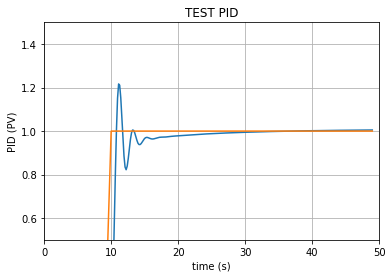

In [26]:
time_sm = np.array(time_list)
time_smooth = np.linspace(time_sm.min(), time_sm.max(), 300)

# feedback_smooth = spline(time_list, feedback_list, time_smooth)
# Using make_interp_spline to create BSpline
helper_x3 = make_interp_spline(time_list, feedback_list)
feedback_smooth = helper_x3(time_smooth)

plt.plot(time_smooth, feedback_smooth)
plt.plot(time_list, setpoint_list)
plt.xlim((0, END))
plt.ylim((min(feedback_list)-0.5, max(feedback_list)+0.5))
plt.xlabel('time (s)')
plt.ylabel('PID (PV)')
plt.title('TEST PID')

plt.ylim((1-0.5, 1+0.5))

plt.grid(True)
plt.show()